In [1]:
import numpy as np
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, ZeroPadding2D, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

2022-02-10 19:04:47.618225: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-10 19:04:47.618258: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist('Datasets/FashionMNIST', kind='train')
X_test, y_test = load_mnist('Datasets/FashionMNIST', kind='t10k')

In [4]:
print(X_train.shape, y_train.shape,"\n", X_test.shape, y_test.shape)

(60000, 784) (60000,) 
 (10000, 784) (10000,)


In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) #first way (3 Channel)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
X_test = np.expand_dims(X_test, axis=3) #secend way (3 Channel)

In [6]:
print(X_train.shape, y_train.shape,"\n", X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) 
 (10000, 28, 28, 1) (10000,)


In [7]:
def Normalize(data):
    return data / 255.0

In [8]:
X_train = Normalize(X_train)
X_test = Normalize(X_test)

In [9]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, kernel_size=3, activation='relu'),
    Dropout(rate=0.2),
    MaxPool2D(pool_size=(2, 2), strides=2),
    ZeroPadding2D(padding=1),
    Conv2D(64, kernel_size=3, activation='relu'),
    Dropout(rate=0.5),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
])

2022-02-10 19:04:49.849991: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-10 19:04:49.850018: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-10 19:04:49.850036: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (love-me): /proc/driver/nvidia/version does not exist
2022-02-10 19:04:49.850223: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 30, 30, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                        

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
print("",y_train[1],"\n", y_test[0])

 0 
 9


In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("",y_train[1],"\n", y_test[0])

 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=256)

Epoch 1/5


2022-02-10 19:04:50.049403: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


235/235 [==============================] - 37s 154ms/step - loss: 0.6493 - accuracy: 0.7636 - val_loss: 0.5246 - val_accuracy: 0.8494
Epoch 2/5
235/235 [==============================] - 37s 156ms/step - loss: 0.4201 - accuracy: 0.8501 - val_loss: 0.4342 - val_accuracy: 0.8730
Epoch 3/5
235/235 [==============================] - 38s 160ms/step - loss: 0.3700 - accuracy: 0.8691 - val_loss: 0.3775 - val_accuracy: 0.8848
Epoch 4/5
235/235 [==============================] - 38s 160ms/step - loss: 0.3408 - accuracy: 0.8776 - val_loss: 0.3735 - val_accuracy: 0.8872
Epoch 5/5
235/235 [==============================] - 38s 163ms/step - loss: 0.3177 - accuracy: 0.8866 - val_loss: 0.3533 - val_accuracy: 0.8919


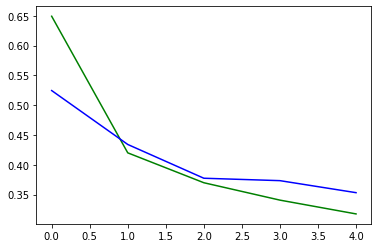

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='green', label='train data')
plt.plot(history.history['val_loss'], color='blue', label='test data')

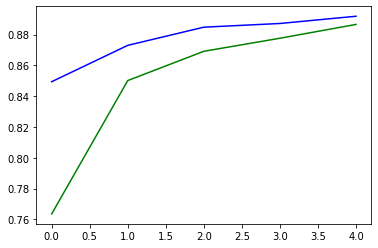

In [17]:
plt.plot(history.history['accuracy'], color='green', label='train data')
plt.plot(history.history['val_accuracy'], color='blue', label='test data')

In [19]:
# model.save('fashionmnsit.h5')